**Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Loading Data*


In [2]:
price_dataset_path=r"C:\Users\hp\Kifiya Projects\Brent Oil Price Evolution\Brent-Oil-Price-Volatility\data\raw\BrentOilPrices.csv"
event_dataset_path=r"C:\Users\hp\Kifiya Projects\Brent Oil Price Evolution\Brent-Oil-Price-Volatility\data\event\Events.csv"

oil_price_df=pd.read_csv(price_dataset_path)
event_df=pd.read_csv(event_dataset_path)

In [3]:
event_df.head(20)
event_df=event_df.dropna()

In [4]:
event_df

,Event Name,Approximate Start Date,Type,Brief Description
0,First Gulf War,2-Aug-1990,Geopolitical,"Iraqi invasion of Kuwait, leading to significa..."
1,Asian Financial Crisis,2-Jul-1997,Economic Shock,"Economic downturn in Asia, a major oil consume..."
2,September 11 Attacks,11-Sep-2001,Geopolitical,"Terrorist attacks in the US, causing immediate..."
3,Iraq War (Invasion),23-Mar-2003,Geopolitical,"US-led invasion of Iraq, initially causing sup..."
4,Global Financial Crisis,15-Sep-2008,Economic Shock,Severe global recession leading to a sharp col...
5,Arab Spring Uprisings,17-Dec-2010,Geopolitical,Political unrest across the Middle East and No...
7,Saudi Arabia's decision not to cut production,14-Jun-2014,OPEC Decision,OPEC (led by Saudi Arabia) decided not to cut ...
8,Iran Nuclear Deal (Sanctions Lifted),16-Jan-2016,Geopolitical,"Lifting of sanctions on Iran, allowing more Ir..."
9,COVID-19 Pandemic,19-Mar-2020,Economic Shock,Global lockdowns and travel restrictions leadi...
10,OPEC+ Production Cuts,12-Apr-2020,OPEC Decision,Historic agreement by OPEC+ to drastically cut...


In [5]:
#Change the Data Columns into datatime type
oil_price_df["Date"]=pd.to_datetime(oil_price_df["Date"])
event_df["Approximate Start Date"]=pd.to_datetime(event_df["Approximate Start Date"])
oil_price_df.set_index("Date",inplace=True)
print(oil_price_df.info())

C:\Users\hp\AppData\Local\Temp\ipykernel_11148\4125635689.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_price_df["Date"]=pd.to_datetime(oil_price_df["Date"])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB
None


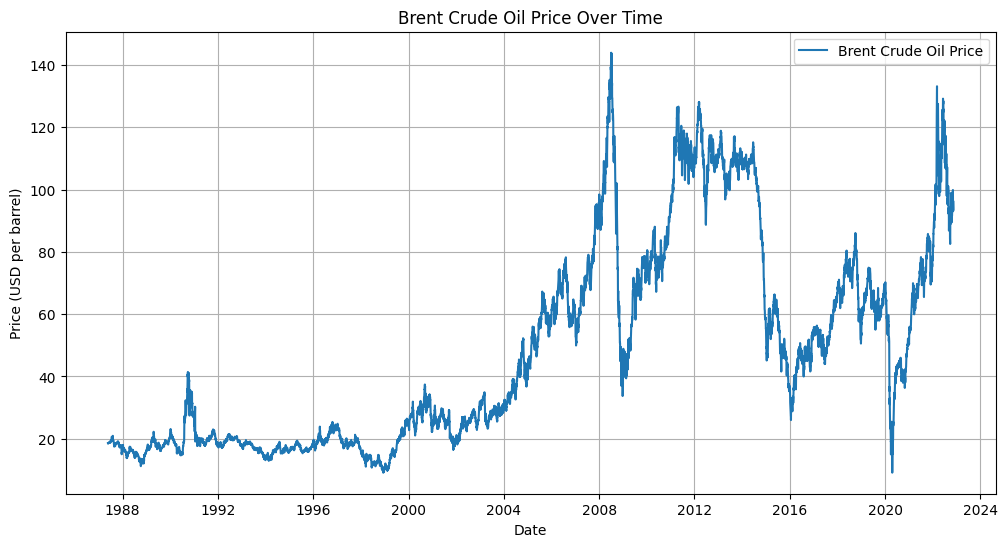

In [6]:
# Plot the raw price series
plt.figure(figsize=(12, 6))
plt.plot(oil_price_df.index, oil_price_df['Price'], label='Brent Crude Oil Price')
plt.title('Brent Crude Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.grid(True)
plt.legend()
plt.show()

In [8]:

# Calculate the log returns
oil_price_df['Log_Returns'] = np.log(oil_price_df['Price'] / oil_price_df['Price'].shift(1))

# Drop the first row which will have a NaN value
oil_price_df.dropna(inplace=True)

# Display the first few rows to see the new column
print(oil_price_df.head())

            Price  Log_Returns
Date                          
1987-05-21  18.45    -0.009709
1987-05-22  18.55     0.005405
1987-05-25  18.60     0.002692
1987-05-26  18.63     0.001612
1987-05-27  18.60    -0.001612


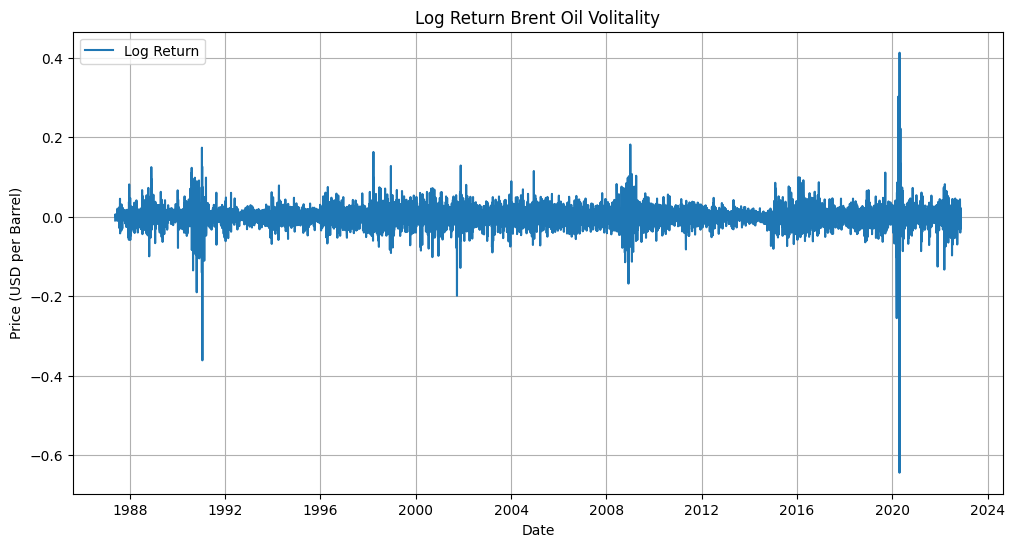

In [11]:
plt.figure(figsize=(12,6))
plt.plot(oil_price_df.index,oil_price_df["Log_Returns"],label="Log Return")
plt.title("Log Return Brent Oil Volitality")
plt.xlabel("Date")
plt.ylabel("Price (USD per Barrel)")
plt.grid(True)
plt.legend()
plt.show()